## Week 2: Envelope Rejection Sampling

### Generate random numbers with Uniform distribution ~ U(0,1)

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import math

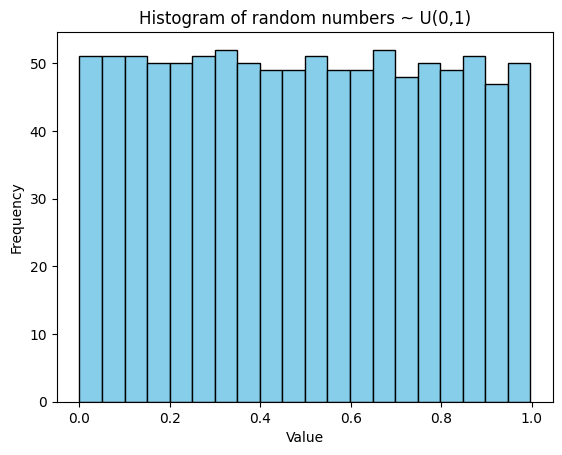

In [88]:
def generate_uniform_samples(N, m=2**10, a = 1103515, c = 12345, X = 5):
    U = []
    for i in range(N):
        X = (a*X+c)%m
        output = X/m
        U.append(output)
    return U

#main
m = 2**10  # Số nguyên lớn
a = 1103515 # Thừa số nguyên
c = 12345     # Hằng số nguyên
X = 5   # Số nguyên khởi tạo
N = 1000   # Số lượng số ngẫu nhiên cần tạo

uniform_samples = generate_uniform_samples(N)
plt.hist(uniform_samples, bins=20, color = 'skyblue', edgecolor='black')
plt.title("Histogram of random numbers ~ U(0,1)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

## Generate random numbers using the Envelope Rejection Sampling method

### Generate samples of Exponential distribution using Uniform distribution as proposal density

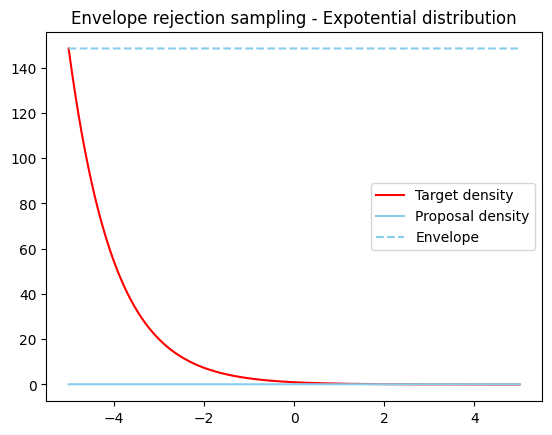

In [89]:
#Target density f(x)
def exponential_pdf(x, lamda=1):
    return lamda*np.exp(-lamda*x)

#Proposal density g(x)
def uniform_pdf(x, a=-5, b=5):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

#Determine parameters
N = 5000
x = np.linspace(-5, 5, N)

# Plot target and proposal PDF
plt.plot(x, exponential_pdf(x), color = "red", label = "Target density")
plt.plot(x, uniform_pdf(x), color = "skyblue", label = "Proposal density")

#Calculate the constant c > 0 such that f (x) ≤ c . g(x) for all x
c = max(exponential_pdf(x) / uniform_pdf(x))

#Plot envelope c*g
plt.plot(x, c*uniform_pdf(x), color = "skyblue", linestyle = "--", label = "Envelope")
plt.title("Envelope rejection sampling - Expotential distribution")
plt.legend()

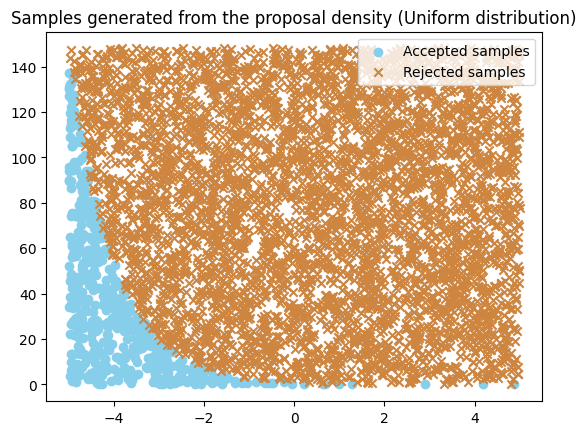

In [90]:
#Generate random samples X from the proposal density
samples = np.random.uniform(-5, 5, N)

#Generate U ~ U(0,1)
U = np.array(generate_uniform_samples(N))

#Apply Envelope rejection sampling: c.g(x).U <= f(x) ---> U <= f(x)/(c.g(x))
accepted = U <= (exponential_pdf(samples) / (c * uniform_pdf(samples)))

# Plot the accepteded samples
plt.scatter(samples[accepted] , U[accepted] * c * uniform_pdf(samples[accepted] ), color = "skyblue", marker = "o", label='Accepted samples')

# Plot the rejected samples
plt.scatter(samples[~accepted], U[~accepted] * c * uniform_pdf(samples[~accepted]), color = "peru", marker = "x", label = 'Rejected samples')

plt.title('Samples generated from the proposal density (Uniform distribution)')
plt.legend(loc=1)

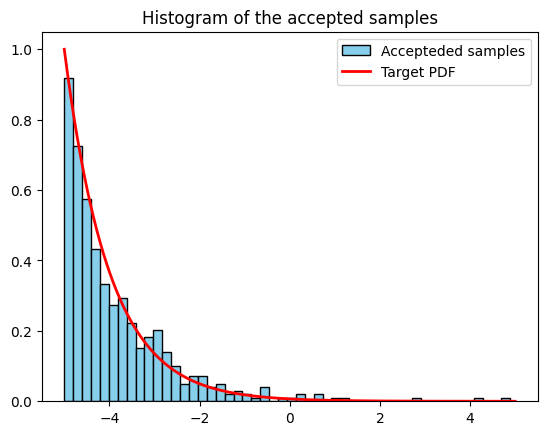

In [91]:
# Histogram of the accepteded samples with the target PDF
plt.hist(samples[accepted], density = True, bins = 50, color = 'skyblue', label = "Accepteded samples", edgecolor='black')

# Compute the target PDF values
pdf_values_unnormalized = exponential_pdf(x)

# Normalize the target PDF
integral = np.trapz(pdf_values_unnormalized, x)
pdf_values_normalized = pdf_values_unnormalized / integral
plt.plot(x, pdf_values_normalized, color = "red", label = "Target PDF", lw=2)

plt.title("Histogram of the accepted samples")
plt.legend()
plt.show()

### Generate samples of Half-normal distribution using Exponential distribution as proposal density

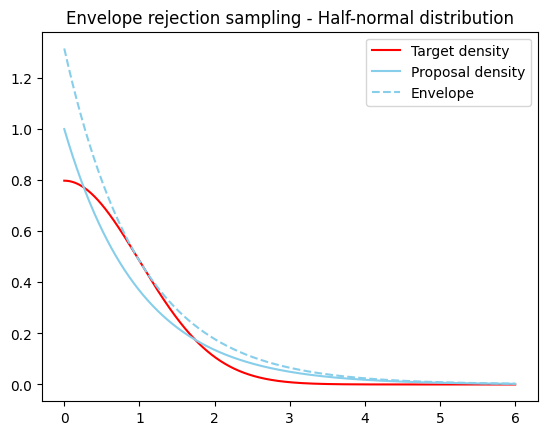

In [92]:
#Target density f(x)
def half_normal_pdf(x):
    return 2/math.sqrt(2*math.pi) * np.exp(-x**2/2)
    
#Proposal density g(x)
def exponential_pdf(x, lamda=1):
    return lamda*np.exp(-lamda*x)

#Determine parameters
N = 5000
x = np.linspace(0, 6, N)
lamda = 1

#Determine the constant c such that  c.g(x) >= f(x) for all x
c = math.sqrt(2/(math.pi*lamda**2)) * np.exp(lamda**2/2) # Fomular according to page 21 Wiley Series book

#Plot target density, proposal density and envelope
plt.plot(x, half_normal_pdf(x), color = 'red', label = 'Target density')
plt.plot(x, exponential_pdf(x, lamda), color = 'skyblue', label = 'Proposal density')
plt.plot(x, c*exponential_pdf(x, lamda), linestyle = '--', color = 'skyblue', label = 'Envelope')
plt.title("Envelope rejection sampling - Half-normal distribution")
plt.legend()

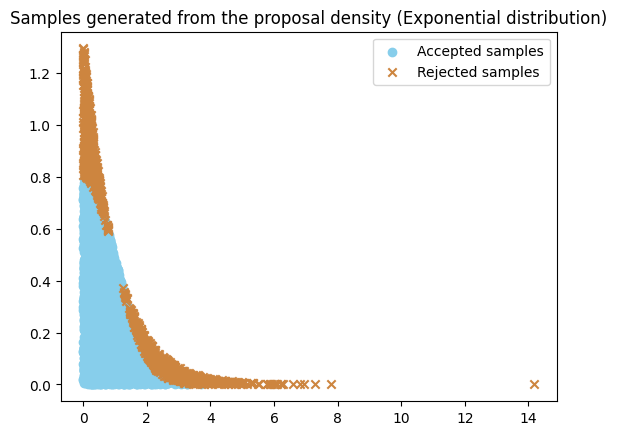

In [93]:
#Generate random samples from the proposal density (Exponential distribution)
samples = np.random.exponential(1 / lamda, N)

#Generate U ~ U(0,1)
U = np.array(generate_uniform_samples(N))

#Apply Envelope rejection sampling: c.g(x).U <= f(x) ---> U <= f(x)/(c.g(x))
accepted = U <= half_normal_pdf(samples) / (c*exponential_pdf(samples, lamda))

'''
#Another way to create the mask of accepted samples: U <= exp (-1/2(x-lamda)^2) (page 21 Wiley Series book)
accepted = U <= np.exp(-1/2*((samples-lamda)**2))
'''

# Plot the accepted samples
plt.scatter(samples[accepted] , U[accepted] * c * exponential_pdf(samples[accepted] ), color = "skyblue", marker = "o", label = 'Accepted samples')
# Plot the rejected samples
plt.scatter(samples[~accepted], U[~accepted] * c * exponential_pdf(samples[~accepted]), color = "peru", marker = "x", label = 'Rejected samples')

plt.title('Samples generated from the proposal density (Exponential distribution)')
plt.legend()

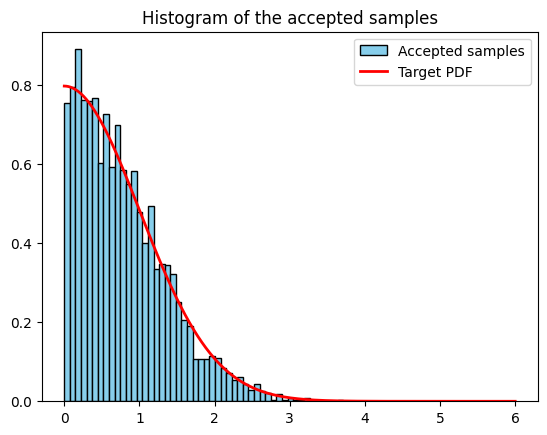

In [94]:
# Histogram of the accepted samples with the target PDF
plt.hist(samples[accepted], density = True, bins = 50, color = 'skyblue', label = "Accepted samples", edgecolor='black')
# plt.plot(x, half_normal_pdf(x), color = "green", label = "target", lw=2)

# Compute the target PDF values
pdf_values_unnormalized = half_normal_pdf(x)

# Normalize the target PDF
integral = np.trapz(pdf_values_unnormalized, x)
pdf_values_normalized = pdf_values_unnormalized / integral
plt.plot(x, pdf_values_normalized, color = "red", label = "Target PDF", lw=2)

plt.title("Histogram of the accepted samples")
plt.legend()
plt.show()

### Generate samples of Laplace distribution using Normal distribution as proposal density

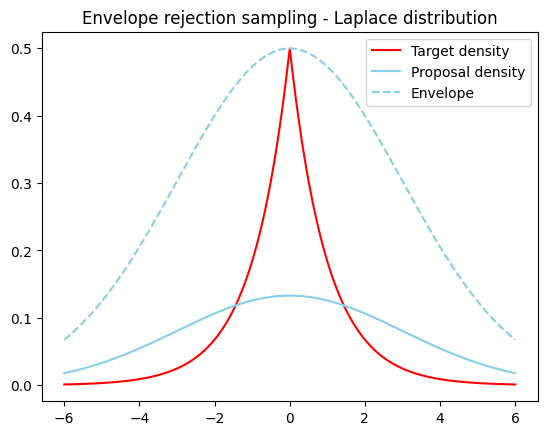

In [95]:
#Target density f(x)
def laplace_pdf(x, mu=0, b=1):
    return 1/(2*b) * np.exp(-abs(x-mu)/b)

#Proposal density g(x)
def normal_pdf(x, mu=0, sigma=3):
    coefficient = 1 / (sigma * math.sqrt(2 * math.pi))
    exponent = -((x - mu) ** 2) / (2 * sigma ** 2)
    pdf_values = coefficient * np.exp(exponent)
    return pdf_values
    
#Determine parameter
N = 5000
x = np.linspace(-6, 6, N) 

#Determine the constant c such that  c.g(x) >= f(x) for all x
c = max(laplace_pdf(x)/normal_pdf(x))

#Plot the target density, proposal density and envelope
plt.plot(x, laplace_pdf(x), color = 'red', label = 'Target density')
plt.plot(x, normal_pdf(x), color = 'skyblue', label = 'Proposal density')
plt.plot(x, c*normal_pdf(x), linestyle = '--', color = 'skyblue', label = 'Envelope')
plt.title("Envelope rejection sampling - Laplace distribution")
plt.legend()    

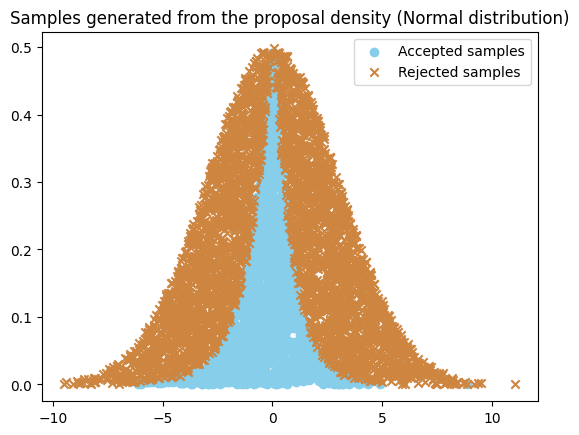

In [96]:
#Generate random samples X from the target density
samples = np.random.normal(0, 3, N) # N random numbers from a normal distribution with mean = 0 and std = 3

#Generate U ~ U(0,1)
U = np.array(generate_uniform_samples(N))

#Apply envelope rejection sampling: c.g(x).U <= f(x) ---> U <= f(x)/(c.g(x))
accepted = U <= laplace_pdf(samples) / (c*normal_pdf(samples, lamda)) # Create mask of accepted samples

# Plot the accepted samples
plt.scatter(samples[accepted] , U[accepted] * c * normal_pdf(samples[accepted] ), color = "skyblue", marker = "o", label = 'Accepted samples')

# Plot the rejected samples
plt.scatter(samples[~accepted], U[~accepted] * c * normal_pdf(samples[~accepted]), color = "peru", marker = "x", label = 'Rejected samples')

plt.title('Samples generated from the proposal density (Normal distribution)')
plt.legend()

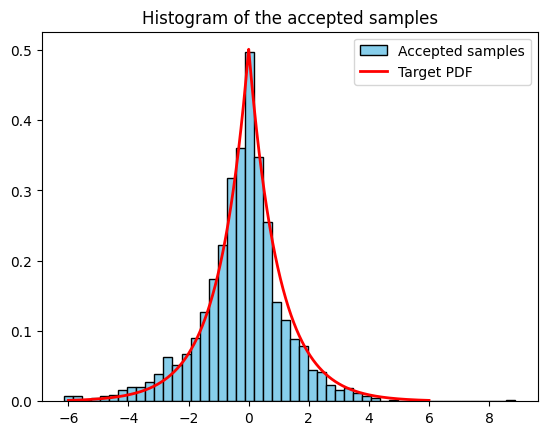

In [97]:
# Compare the histogram of the accepted samples with the target function
plt.hist(samples[accepted], density = True, bins = 50, color = 'skyblue', label = "Accepted samples", edgecolor='black')

# Compute the target PDF values
pdf_values_unnormalized = laplace_pdf(x)

# Normalize the target PDF
integral = np.trapz(pdf_values_unnormalized, x)
pdf_values_normalized = pdf_values_unnormalized / integral
plt.plot(x, pdf_values_normalized, color = "red", label = "Target PDF", lw=2)

plt.title("Histogram of the accepted samples")
plt.legend()
plt.show()